In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)
df.dropna(subset=["Age", "Embarked"], inplace=True)
df["Sex"] = df["Sex"].map({"female": 1, "male": 0})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
889,1,1,0,26.0,0,0,30.0000,1


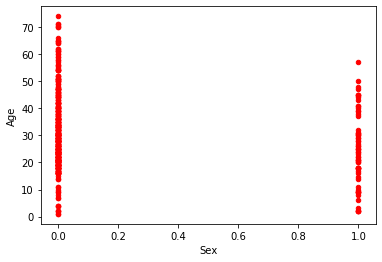

In [7]:
survivors = df[df["Survived"] == 1]
casualties = df[df["Survived"] == 0]

casualties.plot.scatter("Sex", "Age", c="r")
# survivors.plot.scatter("Sex", "Age", c="g")

In [19]:
# import matplotlib.pyplot as plt

survivors = df[df["Survived"] == 1]
casualties = df[df["Survived"] == 0]

pd.DataFrame(scaler.transform(casualties.drop(columns=["Survived"])), columns=df.drop(columns=["Survived"]).columns) #.plot.scatter("Sex", "Age", c="r")
pd.DataFrame(scaler.transform(survivors.drop(columns=["Survived"])), columns=df.drop(columns=["Survived"]).columns) # .plot.scatter("Sex", "Age", c="g")

# pd.DataFrame(scaler.transform(casualties.drop(columns=["Survived"])), columns=df.drop(columns=["Survived"]).columns).plot.scatter("Sex", "Age", c="r")
# pd.DataFrame(scaler.transform(survivors.drop(columns=["Survived"])), columns=df.drop(columns=["Survived"]).columns).plot.scatter("Sex", "Age", c="g")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0.472229,0.2,0.000000,0.139136,0.5
1,1.0,1.0,0.321438,0.0,0.000000,0.015469,0.0
2,0.0,1.0,0.434531,0.2,0.000000,0.103644,0.0
3,1.0,1.0,0.334004,0.0,0.333333,0.021731,0.0
4,0.5,1.0,0.170646,0.2,0.000000,0.058694,0.5
...,...,...,...,...,...,...,...
283,1.0,1.0,0.183212,0.0,0.000000,0.014102,0.5
284,0.0,1.0,0.698417,0.0,0.166667,0.162314,0.5
285,0.5,1.0,0.308872,0.0,0.166667,0.050749,0.0
286,0.0,1.0,0.233476,0.0,0.000000,0.058556,0.0


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df.drop(columns=["Survived"])

scaler.fit(df.drop(columns=["Survived"]))


scaler.transform(df.drop(columns=["Survived"]))

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 1.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [0.        , 1.        , 0.23347575, ..., 0.        , 0.0585561 ,
        0.        ],
       [0.        , 0.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [10]:
data_train = df.iloc[:500]
data_test = df.iloc[500:]

Y_train = data_train["Survived"]
X_train = data_train.drop(columns=["Survived"])

Y_test = data_test["Survived"]
X_test = data_test.drop(columns=["Survived"])

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
627,1,1,21.0,0,0,77.9583,0
628,3,0,26.0,0,0,7.8958,0
630,1,0,80.0,0,0,30.0000,0
631,3,0,51.0,0,0,7.0542,0


In [9]:
from sklearn.svm import SVC

classifier = SVC()

# apprentisage sur la base de training
classifier.fit(X_train, Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# prediction
classifier.predict(X_test)
# X_test.iloc[6]
# Y_test.iloc[6]

1

In [23]:
classifier.score(X_test, Y_test)

0.7028301886792453

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df.drop(columns=["Survived"]))

data_train = df.iloc[:500]
data_test = df.iloc[500:]

Y_train = data_train["Survived"]
X_train = scaler.transform(data_train.drop(columns=["Survived"]))

Y_test = data_test["Survived"]
X_test = scaler.transform(data_test.drop(columns=["Survived"]))

X_train

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 1.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 0.        , 0.63558683, ..., 0.        , 0.01376888,
        0.        ],
       [0.        , 0.        , 0.39683338, ..., 0.        , 0.05953204,
        0.5       ]])

In [8]:
import numpy as np

np.logspace(0.1, 40, base=1.06)

array([ 1.0058439 ,  1.05471905,  1.10596911,  1.15970946,  1.21606112,
        1.27515098,  1.33711208,  1.40208395,  1.47021288,  1.54165227,
        1.61656299,  1.69511371,  1.7774813 ,  1.86385124,  1.95441799,
        2.04938548,  2.14896756,  2.25338845,  2.36288328,  2.47769859,
        2.59809291,  2.72433734,  2.85671613,  2.99552737,  3.14108361,
        3.2937126 ,  3.45375801,  3.62158022,  3.79755712,  3.98208494,
        4.17557918,  4.37847554,  4.59123088,  4.81432425,  5.048258  ,
        5.29355886,  5.55077919,  5.82049815,  6.10332308,  6.39989082,
        6.71086913,  7.03695824,  7.37889242,  7.73744158,  8.11341308,
        8.50765347,  8.92105048,  9.35453494,  9.80908292, 10.28571794])

In [9]:
from sklearn.svm import SVC
import numpy as np
from itertools import product

max_score = 0
max_C = None
max_kernel = None

# trouver le C et kernel (linear, rbf, sigmoid) pour avoir le meilleur score 
for k, C in product(["rbf", "sigmoid"], np.logspace(0.1, 40, base=1.02)):
    cls = SVC(C=C, kernel=k)
    cls.fit(X_train, Y_train)

    # cls.predict(X_test)
    score = cls.score(X_test, Y_test)
    if score > max_score:
        max_score = score
        max_C = C
        max_kernel = kernel

    print(f"C = {C}, kernel = {kernel}, score = {score}")
    
print(f"MEILEURS RESULTATS : C = {max_C}, kernel = {max_kernel}, score = {max_score}")


C = 1.0019822247447452, kernel = rbf, score = 0.7971698113207547
C = 1.0182701530937168, kernel = rbf, score = 0.7971698113207547
C = 1.0348228532154302, kernel = rbf, score = 0.7971698113207547
C = 1.0516446291619497, kernel = rbf, score = 0.7971698113207547
C = 1.068739854950745, kernel = rbf, score = 0.7971698113207547
C = 1.0861129757020265, kernel = rbf, score = 0.8018867924528302
C = 1.1037685087945717, kernel = rbf, score = 0.8018867924528302
C = 1.1217110450403391, kernel = rbf, score = 0.8018867924528302
C = 1.1399452498781761, kernel = rbf, score = 0.8018867924528302
C = 1.1584758645869313, kernel = rbf, score = 0.8018867924528302
C = 1.1773077075182885, kernel = rbf, score = 0.8018867924528302
C = 1.196445675349639, kernel = rbf, score = 0.8018867924528302
C = 1.2158947443573218, kernel = rbf, score = 0.8018867924528302
C = 1.23565997171056, kernel = rbf, score = 0.8018867924528302
C = 1.2557464967864327, kernel = rbf, score = 0.8018867924528302
C = 1.2761595425062209, kerne

In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN

max_score = 0
max_n = None

# faire un boucle pour trouver le n_neighbors qui donne le meilleur score
for n in range(10):
    cls = KNN(n_neighbors=n*2+1)
    cls.fit(X_train, Y_train)

    # cls.predict(X_test)
    score = cls.score(X_test, Y_test)
    if score > max_score:
        max_score = score
        max_n = 2*n+1
    print(f"n = {n} score = {score}")

n = 0 score = 0.7216981132075472
n = 1 score = 0.7924528301886793
n = 2 score = 0.7924528301886793
n = 3 score = 0.8113207547169812
n = 4 score = 0.8113207547169812
n = 5 score = 0.8207547169811321
n = 6 score = 0.8113207547169812
n = 7 score = 0.8066037735849056
n = 8 score = 0.8018867924528302
n = 9 score = 0.8018867924528302


In [28]:
max_n

7